In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as mpatches
import numpy as np
from gaze_utility import calculate_dist_and_veloc
from fixation import generate_IVT_fixation
from preprocessing import remove_outlier_by_z, get_participant_names
from gaze_plot import fixation_based_plot

# global variables
data_path = 'data/'
exp_img_path = 'exp-img/'
result_path = 'result/'
events = ['gaze_grid_1', 'gaze_ranking_grid_1', 'gaze_grid_2', 'gaze_ranking_grid_2']
exps = ['grid_1', 'grid_2']
xn = 'GazeX'
yn = 'GazeY'


# get participant names
names = get_participant_names(data_path)
print('participants names: ', names)
print('participant num: ', len(names))

participants names:  ['xiao', 'dao', 'hw', 'yq', 'mh', 'lf', 'ts', 'yx', 'yz', 'an', 'hu', 'lr', 'huy', 'co', 'jt', 'mr']
participant num:  16


In [2]:
# generate grid img
if not os.listdir(exp_img_path):
    from generate_experiment_img import *
    for file_name in click_rank_files:
        generate_grid_iamge(get_grid_image_order(data_path, file_name))

# Single Anaylsis （for test)

<AxesSubplot:xlabel='GazeX', ylabel='GazeY'>

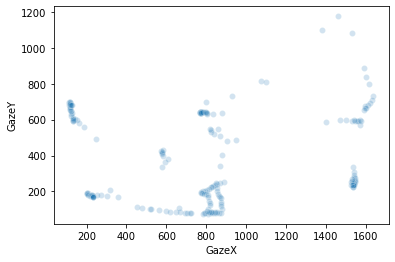

In [3]:
# take grid1 of for example
name = 'lf'
exp = 'grid_2'
exp_img = mpimg.imread(exp_img_path + name + '_' + exp + '.jpg')
gaze_data = pd.read_json(data_path + name + '_gaze.txt', lines=True)
data = gaze_data.loc[gaze_data['record_event'] == 'gaze_ranking_grid_2']
sns.scatterplot(x=xn, y=yn, data=data, alpha=0.2)

In [4]:
data.head()

,GazeX,GazeY,HeadX,HeadY,HeadZ,HeadYaw,HeadPitch,HeadRoll,rx,ry,rw,rh,state,time,FrameNr,Xview,Yview,docX,docY,record_event
1307,887.0,254.2,-1.3,-1.6,41.4,-0.4,1.3,2.3,150,135,314,314,0,1597777083130,6838,0.461979,0.211833,887.0,254.2,gaze_ranking_grid_2
1308,869.4,245.8,-1.3,-1.6,41.4,-0.4,1.3,2.3,150,135,314,314,0,1597777083201,6840,0.452813,0.204833,869.4,245.8,gaze_ranking_grid_2
1309,855.2,242.0,-1.3,-1.6,41.4,-0.3,1.4,2.3,150,135,314,314,0,1597777083229,6841,0.445417,0.201667,855.2,242.0,gaze_ranking_grid_2
1310,842.4,235.2,-1.3,-1.6,41.4,-0.2,1.4,2.3,150,135,314,314,0,1597777083296,6843,0.438750,0.196000,842.4,235.2,gaze_ranking_grid_2
1311,833.6,228.8,-1.3,-1.6,41.3,-0.2,1.4,2.3,150,135,314,314,0,1597777083331,6844,0.434167,0.190667,833.6,228.8,gaze_ranking_grid_2


<AxesSubplot:xlabel='GazeX', ylabel='GazeY'>

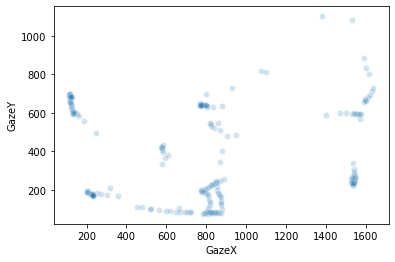

In [5]:
# drop NaN (happened in 'co' data)
data.dropna(inplace=True)
# remove outlier
data = remove_outlier_by_z(data, xn)
data = remove_outlier_by_z(data, yn)
sns.scatterplot(x=xn, y=yn, data=data, alpha=0.2)

In [6]:
# calculate dist, velocity, time passed
data['distance'], data['velocity'], data['time_pass'] = calculate_dist_and_veloc(data)

0.1     51
0.2     41
0.3     27
0.4     15
0.0     14
0.7      7
0.5      7
0.6      6
1.0      5
1.3      3
1.1      3
1.5      3
2.2      3
2.1      2
14.3     2
0.9      2
1.4      2
3.0      1
16.5     1
3.7      1
0.8      1
1.6      1
13.0     1
9.8      1
10.2     1
5.6      1
2.8      1
5.8      1
4.3      1
17.7     1
1.2      1
1.8      1
4.2      1
4.6      1
Name: velocity, dtype: int64


<AxesSubplot:xlabel='velocity'>

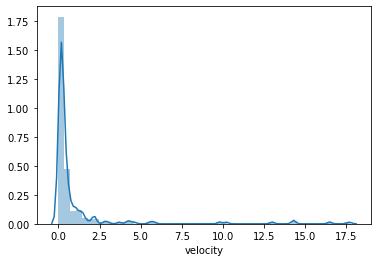

In [7]:
v = data['velocity'].round(1)
print(v.value_counts())
sns.distplot(v)

<AxesSubplot:>

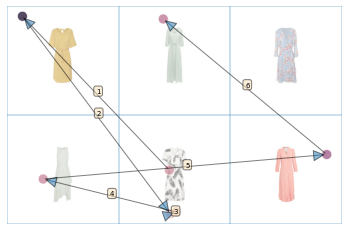

In [8]:
fixation_based_plot(data=data, v_th=0.5, d_th=300, xn=xn, yn=yn, background=exp_img)

# Batch Analysis

In [4]:
for name in names:
    gaze_data = pd.read_json(data_path + name + '_gaze.txt', lines=True)
    for event in events:
        # log
        print('start: ' + name + '-' + event)
        # load data
        data = gaze_data.loc[gaze_data['record_event'] == event]
        # drop NaN (happened in 'co' data)
        data.dropna(inplace=True)
        # remove outlier
        data = remove_outlier_by_z(data, xn)
        data = remove_outlier_by_z(data, yn)
        # construct attr
        data['distance'], data['velocity'], data['time_pass'] = calculate_dist_and_veloc(data)
        # select experiment grid img
        if exps[0] in event: exp = exps[0]
        else: exp = exps[1]
        exp_img = mpimg.imread(exp_img_path + name + '_' + exp + '.jpg')
        # plot
        fixation_based_plot(data, v_th=0.5, d_th=300, xn=xn, yn=yn, background=exp_img)
        # export result
        plt.savefig(result_path + name + '_' + event + '_plot.png', format='png')
        # log
        print('finish: ' + name + '-' + event)
        plt.clf()

participants names:  ['lf', 'ts', 'huy', 'mh', 'mr', 'xiao', 'lr', 'dao', 'yx', 'yq', 'hw', 'an', 'jt', 'hu', 'co', 'yz']
participant num:  16
start: lf-gaze_grid_1
finish: lf-gaze_grid_1
start: lf-gaze_ranking_grid_1
finish: lf-gaze_ranking_grid_1
start: lf-gaze_grid_2
finish: lf-gaze_grid_2
start: lf-gaze_ranking_grid_2
finish: lf-gaze_ranking_grid_2
start: ts-gaze_grid_1
finish: ts-gaze_grid_1
start: ts-gaze_ranking_grid_1
finish: ts-gaze_ranking_grid_1
start: ts-gaze_grid_2
finish: ts-gaze_grid_2
start: ts-gaze_ranking_grid_2
finish: ts-gaze_ranking_grid_2
start: huy-gaze_grid_1
finish: huy-gaze_grid_1
start: huy-gaze_ranking_grid_1
finish: huy-gaze_ranking_grid_1
start: huy-gaze_grid_2
finish: huy-gaze_grid_2
start: huy-gaze_ranking_grid_2
finish: huy-gaze_ranking_grid_2
start: mh-gaze_grid_1
finish: mh-gaze_grid_1
start: mh-gaze_ranking_grid_1
finish: mh-gaze_ranking_grid_1
start: mh-gaze_grid_2
finish: mh-gaze_grid_2
start: mh-gaze_ranking_grid_2
finish: mh-gaze_ranking_grid_2
s

<Figure size 432x288 with 0 Axes>